<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass3/bdm/avengers/ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis of Spotify's Musical Landscape August-September 2023

| No. | GROUP NAME | MATRIC NUMBER |
| --- | ---------- | ------------- |
| 1.  | BAKUNGA BRONSON | MCS232006 |
| 2.  | LWANGA AKSAM | MCS231016 |
| 3.  | Ismail Maeen Fateh Allah Yaqot Alawami | MCS221028 |


##Introduction
In an era where music streaming has become a primary medium for audio consumption,understanding what kind of music people like and the characteristics of those songs is really important. This project is aiming to dive into Spotify's song data. We're going to explore a big collection of data that includes lots of details about the songs and information about the tracks.. Through this analysis, we seek to uncover hidden patterns, trends, and insights that define the current musical landscape on Spotify, providing a unique perspective on how listeners interact with music in the digital age.
The analysis questions we are like to answers:
1.   Are certain keys or modes more prevalent in track releases?
2.   Does the spotify data indicate any particular trends in track valence and energy?

3. What are the release patterns for Spotify tracks?
4. How do acousticness, danceability, energy, and loudness trends behave over time?
5. What are the common attributes of tracks in terms of 'vibe score'?




###Big Data Tools Selection for Spotify Dataset Analysis
The primary tool of choice is Apache Spark, known for its ability to handle large data volumes. It's compatible with Python, allowing the use of Python libraries like Pandas for data organization, and Matplotlib and Seaborn for visualization.

In addition to Spark, Dask is also planned to be used. Dask is a Python tool that's useful for handling datasets larger than what Pandas can typically manage. It's beneficial for large tasks that don't require Spark's full capabilities.

 The combination of Apache Spark and Dask, along with Python's analytical libraries, provides a robust setup for effective EDA. This setup is expected to handle the Spotify dataset efficiently and help reveal significant insights.

###Data Loading
let's install the neccessary libraries and tools to be used for our EDA


<a href="https://drive.google.com/file/d/1Vtxeg07qa7FmKasG7BG2GzgbY5TcnWzu/view?usp=sharing">Link for Spotify Track csv file </a>
</br>
<a href="https://drive.google.com/file/d/1Vtxeg07qa7FmKasG7BG2GzgbY5TcnWzu/view?usp=sharing">Link for Audio feature csv file </a>

In [ ]:
#PySpark tool is installed since the dataset is too large (1 GB)
!pip install pyspark

#To be sure for outside use it,let make sure that the following are also installed
!pip install pandas
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=db2c855f174176553be5265e022a96e57339040d4ea8424c3f91e843a3ea688b
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


let's do some imports here

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Initialize a Spark Session

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("Spotify Data Analysis").getOrCreate()


Download the csv files data

In [ ]:
#since the csv was uploaded on google drive  we need this tool to be able to download it
!pip install gdown

# the ID of the file on google drive 1Vtxeg07qa7FmKasG7BG2GzgbY5TcnWzu for spotify track
!gdown --id 1Vtxeg07qa7FmKasG7BG2GzgbY5TcnWzu -O sp_track.csv

# the ID of the file on google drive 1-741n0pCJIkl_m0tdHtRby6i0JJGBPfa for audio features
!gdown --id 1-741n0pCJIkl_m0tdHtRby6i0JJGBPfa -O audio_feature.csv



/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Vtxeg07qa7FmKasG7BG2GzgbY5TcnWzu
To: /content/sp_track.csv
100% 172M/172M [00:03<00:00, 47.5MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-741n0pCJIkl_m0tdHtRby6i0JJGBPfa
To: /content/audio_feature.csv
100% 480M/480M [00:07<00:00, 66.1MB/s]


In [ ]:
#read the csv using the spark
df_sp_track = spark.read.csv('sp_track.csv', header=True, inferSchema=True)
df_audio_features =spark.read.csv('audio_feature.csv',header=True,inferSchema=True)

In [ ]:
df_sp_track,df_audio_features

(DataFrame[track_id: string, track_title: string, duration_ms: string, isrc: string, track_number: string, release_id: string, explicit: string, disc_number: string, preview_url: string, updated_on: string],
 DataFrame[isrc: string, acousticness: double, danceability: double, duration_ms: int, energy: double, instrumentalness: double, key: int, liveness: double, loudness: double, mode: int, speechiness: double, tempo: int, time_signature: int, valence: double, updated_on: timestamp])

Let's display the first 5 rows for both dataframes and see what are going to explore

In [ ]:
df_sp_track.show(5)
df_sp_track.printSchema()

df_audio_features.show(5)
df_audio_features.printSchema()


+--------------------+--------------------+-----------+------------+------------+--------------------+--------+-----------+--------------------+-------------------+
|            track_id|         track_title|duration_ms|        isrc|track_number|          release_id|explicit|disc_number|         preview_url|         updated_on|
+--------------------+--------------------+-----------+------------+------------+--------------------+--------+-----------+--------------------+-------------------+
|05h7hLxcBXnM3dgUZ...|            Suckhole|     146878|DELJ82099977|          23|2MDhYMdgU5GHMj70k...|       f|          1|https://p.scdn.co...|2023-08-22 18:08:48|
|07E5VE2mJxaEESXkO...|             Terrain|     260000|DELJ82099961|           7|2MDhYMdgU5GHMj70k...|       f|          1|https://p.scdn.co...|2023-08-22 18:08:48|
|0kg1lYyW3yAGgF7sk...|Groove with You -...|     255666|USSM11501101|           8|72MfvP136wxG7aeTU...|       f|          1|https://p.scdn.co...|2023-08-22 18:08:48|
|0xvdwCZkG

##Data Cleaning and Preprocessing
Here we are addressing missing values, incorrect data, and formatting issues and merging the different dataframes

In [ ]:
from pyspark.sql.functions import col,to_timestamp

#sp_track dataframe datatype correction
df_sp_track = df_sp_track.withColumn("track_number", col("track_number").cast("integer"))
df_sp_track = df_sp_track.withColumn("explicit", col("explicit").cast("integer"))
df_sp_track = df_sp_track.withColumn("disc_number", col("disc_number").cast("integer"))

#Convert 'updated_on' to timestamp type
df_sp_track = df_sp_track.withColumn("updated_on", to_timestamp("updated_on"))

#updated schema
df_sp_track.printSchema()

root
 |-- track_id: string (nullable = true)
 |-- track_title: string (nullable = true)
 |-- duration_ms: string (nullable = true)
 |-- isrc: string (nullable = true)
 |-- track_number: integer (nullable = true)
 |-- release_id: string (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- disc_number: integer (nullable = true)
 |-- preview_url: string (nullable = true)
 |-- updated_on: timestamp (nullable = true)



In [ ]:
#let's remove the unneccesary columns
df_sp_track = df_sp_track.drop('explicit', 'disc_number', 'preview_url')
df_sp_track


DataFrame[track_id: string, track_title: string, duration_ms: string, isrc: string, track_number: int, release_id: string, updated_on: timestamp]

Since the dataframe for audio features is okay, we shall proceed to the next steps

In [ ]:
sp_num_rows = df_sp_track.count()
print("Number of spotify rows:", sp_num_rows)
audio_features_num_rows =df_audio_features.count()
print("Number of Audio Features rows:", audio_features_num_rows)

Number of spotify rows: 774923
Number of Audio Features rows: 4687104


In [ ]:
#given the dataset is large we shall simply drop na
df_sp_track = df_sp_track.na.drop()
df_audio_features = df_audio_features.na.drop()

In [ ]:
sp_num_rows = df_sp_track.count()
print("Number of spotify rows:", sp_num_rows)
audio_features_num_rows =df_audio_features.count()
print("Number of Audio Features rows:", audio_features_num_rows)

Number of spotify rows: 774833
Number of Audio Features rows: 4687104


In [ ]:
# Creating aliases for each DataFrame
df_sp_track_alias = df_sp_track.alias("sp")
df_audio_features_alias = df_audio_features.alias("af")
df_sp_track = df_sp_track.withColumnRenamed('duration_ms', 'sp_duration_ms')

df_audio_features = df_audio_features.withColumnRenamed('duration_ms', 'af_duration_ms')
df_audio_features = df_audio_features.withColumnRenamed('updated_on', 'af_updated_on')

# Perform the join using aliases
df_merged = df_audio_features_alias.join(df_sp_track_alias, col("af.isrc") == col("sp.isrc"), "left")
# Dropping one of the duplicate 'isrc' columns
df_merged = df_merged.drop(col("sp.isrc"))
df_merged

DataFrame[isrc: string, acousticness: double, danceability: double, af_duration_ms: int, energy: double, instrumentalness: double, key: int, liveness: double, loudness: double, mode: int, speechiness: double, tempo: int, time_signature: int, valence: double, af_updated_on: timestamp, track_id: string, track_title: string, sp_duration_ms: string, track_number: int, release_id: string, updated_on: timestamp]

Let's consider it as a pandas DataFrame now . However this is not advisable since there are different environment requirements that might not be supported by such an operation when working with big data.
If not sure as team , we request you use a sample fraction like 0.1
<br/>
```
df_sampled = df_sp__track_audio_features.sample(fraction=0.1)
```

However , as we shall continue working with the pandas Data frame for our new merged data

In [ ]:

def to_pandas_in_chunks(spark_df, chunk_size=1000000):
    pandas_df_chunks = []
    total_rows = spark_df.count()
    for i in range(0, total_rows, chunk_size):
        pandas_df_chunk = spark_df.limit(chunk_size).offset(i).toPandas()
        pandas_df_chunks.append(pandas_df_chunk)
    return pd.concat(pandas_df_chunks, ignore_index=True)


pd_df_sp_track_audio_features = to_pandas_in_chunks(df_merged)
pd_df_sp_track_audio_features.columns


Index(['isrc', 'acousticness', 'danceability', 'af_duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'af_updated_on',
       'track_id', 'track_title', 'sp_duration_ms', 'track_number',
       'release_id', 'updated_on'],
      dtype='object')

##Exploratory Data Analysis

Through EDA, we aim to:

1. <b>Summarize Main Characteristics:</b> We'll use summary statistics to get a feel for
the data, looking at measures like the mean, median, and standard deviation, which provide insights into the central tendency and spread.

2. <b>Uncover Patterns and Anomalies:</b> By exploring the data, we can identify any patterns, trends, or anomalies, which might lead to more specific questions or hypotheses.

3. <b>Visualize Data:</b> Through graphs and plots, we'll visualize the data to understand distributions, relationships, and potential outliers. This can include histograms, scatter plots, and box plots.

4. <b>Prepare for Further Analysis:</b> EDA helps in cleaning and transforming data, setting the stage for more complex analyses like predictive modeling or statistical testing.

###Statistical Summary

In [ ]:
#summary
pd_df_sp_track_audio_features.describe()


,acousticness,danceability,af_duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_number
count,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,175949.000000
mean,0.109957,0.681971,3.383446e+05,0.713630,0.640862,5.557692,0.172892,-9.239397,0.540909,0.085324,126.685102,3.960946,0.399408,16.600998
std,0.223433,0.155581,1.892204e+05,0.209371,0.338673,3.693823,0.162101,4.138255,0.498324,0.082337,20.557330,0.308958,0.255894,11.328264
min,0.000000,0.000000,1.045000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000958,0.606000,2.437700e+05,0.582000,0.417000,2.000000,0.083000,-11.094000,0.000000,0.044500,120.000000,4.000000,0.180000,7.000000
50%,0.008710,0.720000,3.400000e+05,0.748000,0.821000,6.000000,0.109000,-8.681000,1.000000,0.058000,126.000000,4.000000,0.370000,15.000000
75%,0.080700,0.800000,4.117450e+05,0.884000,0.891000,9.000000,0.187000,-6.623000,1.000000,0.085800,132.000000,4.000000,0.591000,24.000000
max,0.996000,1.000000,6.072567e+06,1.000000,1.000000,11.000000,1.000000,5.485000,1.000000,0.968000,250.000000,5.000000,1.000000,50.000000


The summary of our spotify track and audio features  dataframe gives us some interesting information about the music. The average <b>danceability</b> score is <em>0.68</em>, which means most of the tracks are pretty upbeat. The <b>energy level</b> is quite high too, with an average of <em>0.71</em>. The average <b>acousticness</b> is <em>0.10</em>, which means there's a fair bit of acoustic sound in the music.

The length of the tracks varies a lot, but on average, they're about 338,335 milliseconds long. These numbers help us understand what kind of music is in the dataset and can be useful for things like improving the listener's experience, planning marketing strategies, and spotting trends in the music industry.

###Uncover Patterns and Anomalies

In [ ]:
#Correlations
correlation_matrix = pd_df_sp_track_audio_features.corr()
correlation_matrix

<ipython-input-38-7c60f3813e59>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = pd_df_sp_track_audio_features.corr()


,acousticness,danceability,af_duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_number
acousticness,1.000000,-0.397858,-0.162602,-0.519026,-0.040118,-0.037648,-0.021027,-0.461708,-0.012764,0.035522,-0.215152,-0.153767,-0.127352,0.002097
danceability,-0.397858,1.000000,0.091872,0.137427,0.057783,0.040106,-0.149140,0.186226,-0.007085,0.055925,-0.031144,0.164131,0.321893,-0.018063
af_duration_ms,-0.162602,0.091872,1.000000,0.084694,0.196638,0.021343,-0.034724,-0.017701,-0.001136,-0.107427,0.038895,0.037167,-0.091216,0.014195
energy,-0.519026,0.137427,0.084694,1.000000,-0.022369,0.040908,0.136180,0.699750,0.002341,0.004020,0.273946,0.113952,0.176777,-0.000639
instrumentalness,-0.040118,0.057783,0.196638,-0.022369,1.000000,0.016879,-0.115945,-0.268655,0.017743,-0.272897,0.045238,-0.003534,-0.194131,0.034694
key,-0.037648,0.040106,0.021343,0.040908,0.016879,1.000000,-0.004417,0.022029,-0.309219,0.009105,0.008767,0.011299,0.034009,0.001822
liveness,-0.021027,-0.149140,-0.034724,0.136180,-0.115945,-0.004417,1.000000,0.118545,0.006239,0.107547,0.051090,-0.003437,-0.031688,0.013040
loudness,-0.461708,0.186226,-0.017701,0.699750,-0.268655,0.022029,0.118545,1.000000,-0.008275,0.081066,0.222738,0.123105,0.206224,-0.026439
mode,-0.012764,-0.007085,-0.001136,0.002341,0.017743,-0.309219,0.006239,-0.008275,1.000000,0.011740,0.012708,-0.009485,-0.031667,0.004382
speechiness,0.035522,0.055925,-0.107427,0.004020,-0.272897,0.009105,0.107547,0.081066,0.011740,1.000000,0.056150,-0.007838,0.058202,-0.000293


Based on the above , some  key insights:
<b>Acousticness and Energy:</b> There's a strong negative correlation (-0.519026) between acousticness and energy, indicating that tracks with higher acousticness tend to have lower energy levels. This is common in genres like acoustic or classical music.

<b>Danceability and Valence:</b> A moderate positive correlation (0.321893) suggests that more danceable tracks are often perceived as happier or more positive. This could be significant for creating playlists intended to uplift the mood.

<b>Loudness and Energy:</b> The correlation of 0.699750 indicates that louder tracks are typically more energetic. This is a trend often seen in genres like rock or electronic dance music.

<b>Instrumentalness and Speechiness:</b> A negative correlation (-0.272897) implies that tracks with higher instrumental content usually have fewer vocals, as expected in instrumental or classical music.

<b>Tempo and Energy:</b> A positive correlation (0.273946) between tempo and energy might reflect that faster beats are associated with more dynamic and energetic tracks.

Our dataset analysis has uncovered some interesting correlations. For example, we found that songs with a high level of acousticness tend to have lower energy, suggesting a more serene and soothing quality. In contrast, songs with a high danceability score often have a more positive or "**joyful**" valence. Additionally, there's a significant positive correlation between loudness and energy, implying that the louder the track, the more energetic it likely is. These insights are not only academically stimulating but also have practical implications, such as enhancing music recommendation algorithms by understanding these subtleties, leading to a more tailored and enjoyable user experience.

**focused anomaly detection**
<br/>
We use the Interquartile Range (IQR) method on key features: 'loudness', 'tempo', and 'af_duration_ms' for anomaly detection. These features often have meaningful outliers in musical data.

In [ ]:
pd_df_sp_track_audio_features.columns

Index(['isrc', 'acousticness', 'danceability', 'af_duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'af_updated_on',
       'track_id', 'track_title', 'sp_duration_ms', 'track_number',
       'release_id', 'updated_on'],
      dtype='object')

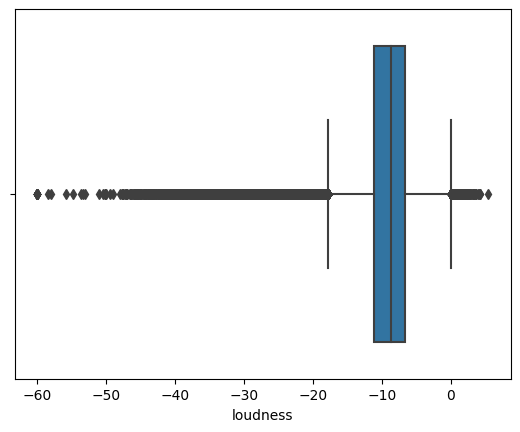

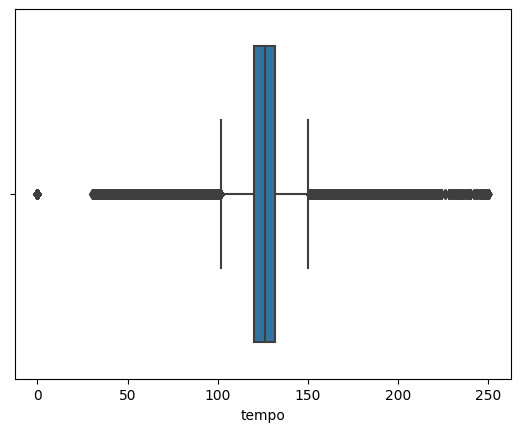

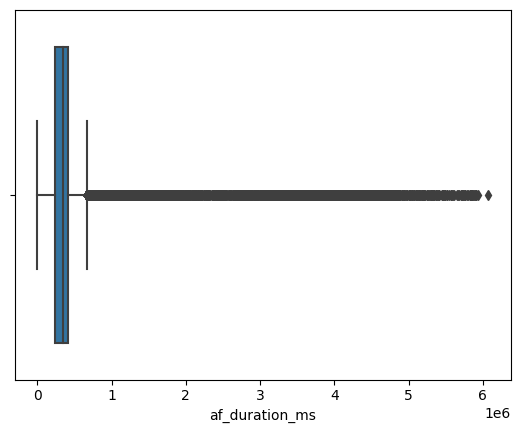

Loudness Outliers:
             isrc  acousticness  danceability  af_duration_ms   energy  \
1   AAA201704185      0.880000         0.193          147000  0.30700   
61  AEA0D1961376      0.000274         0.153          316461  0.43700   
65  AEA0D1978027      0.988000         0.504          305000  0.10700   
67  AEA0D2012283      0.994000         0.553          169378  0.00769   
68  AEA0D2012284      0.229000         0.600          163788  0.22300   

    instrumentalness  key  liveness  loudness  mode  ...  tempo  \
1              0.893    8    0.1640   -20.412     0  ...     68   
61             0.815    0    0.2860   -18.969     1  ...     75   
65             0.947    4    0.1090   -19.709     1  ...    150   
67             0.925    5    0.1080   -26.327     0  ...     63   
68             0.936    3    0.0832   -20.930     0  ...    110   

    time_signature  valence       af_updated_on track_id track_title  \
1                5   0.0392 2023-09-09 12:04:59     None        No

In [ ]:

# Function to detect and return outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers_condition = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    return df[outliers_condition]

# Detect outliers in 'loudness'
loudness_outliers = detect_outliers(pd_df_sp_track_audio_features, 'loudness')

# Detect outliers in 'tempo'
tempo_outliers = detect_outliers(pd_df_sp_track_audio_features, 'tempo')

# Detect outliers in 'duration_ms'
duration_outliers = detect_outliers(pd_df_sp_track_audio_features, 'af_duration_ms')

# Plotting for visualization
sns.boxplot(x=pd_df_sp_track_audio_features['loudness'])
plt.show()
sns.boxplot(x=pd_df_sp_track_audio_features['tempo'])
plt.show()
sns.boxplot(x=pd_df_sp_track_audio_features['af_duration_ms'])
plt.show()

# Analyze the outliers
print("Loudness Outliers:\n", loudness_outliers.head())
print("Tempo Outliers:\n", tempo_outliers.head())
print("Duration Outliers:\n", duration_outliers.head())


From the above , we these insights:

**Loudness Outliers:** Tracks with significantly lower loudness levels than average, like "The Darkness" and "Spaghetti Beach," could represent genres with a softer tone or specific artistic choices. This variance in loudness can impact listener's experience and preferences.

**Tempo Outliers:** Tracks like "Electr" and "Jangalhando" with unusually low tempo could be from genres like ambient or classical, offering a different listening experience. Tempo variations significantly contribute to the mood and style of music.

**Duration Outliers:** Extremely long tracks such as "Onelove Miami 2015" and "Continuous Mix 1" suggest these could be mixes or continuous play albums, offering a different kind of listening experience compared to typical songs. Such long durations are often found in specific music styles like electronic mixes or live concert recordings

Looking at unusual data in the  spotify track and audio feature dataframe shows how diverse the music on the platform is. There are big differences in how loud, fast, and long the songs are, which shows there are many different types of music and ways artists express themselves. This means that all kinds of listeners can find something they like, showing how good Spotify is at being a music streaming service for everyone. The fact that these unusual data points exist shows that Spotify is dedicated to giving its users a wide range of music to listen to.

Trend Analysis

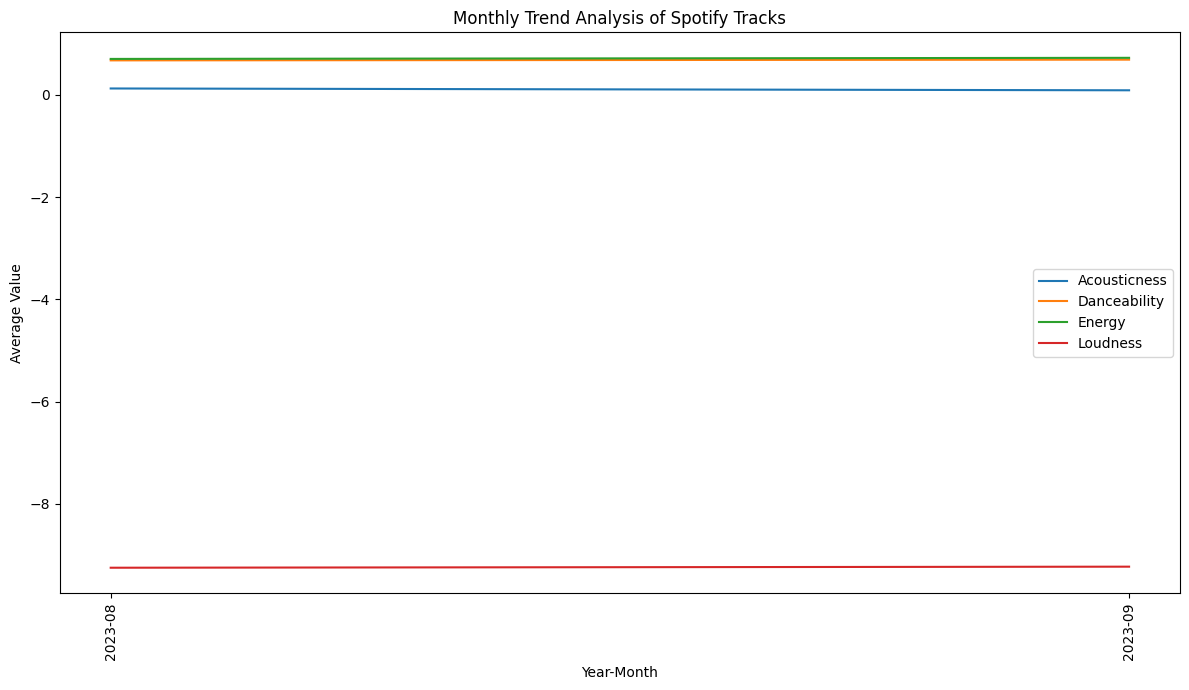

In [ ]:
#Let's group by month and Compute Averages
pd_df_sp_track_audio_features['month_year_af'] = pd.to_datetime(pd_df_sp_track_audio_features['af_updated_on']).dt.to_period('M')

monthly_trend_analysis = pd_df_sp_track_audio_features.groupby('month_year_af').agg({
    'acousticness': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean'
}).reset_index()
monthly_trend_analysis
# Plotting
plt.figure(figsize=(12, 7))
plt.plot(monthly_trend_analysis['month_year_af'].dt.strftime('%Y-%m'), monthly_trend_analysis['acousticness'], label='Acousticness')
plt.plot(monthly_trend_analysis['month_year_af'].dt.strftime('%Y-%m'), monthly_trend_analysis['danceability'], label='Danceability')
plt.plot(monthly_trend_analysis['month_year_af'].dt.strftime('%Y-%m'), monthly_trend_analysis['energy'], label='Energy')
plt.plot(monthly_trend_analysis['month_year_af'].dt.strftime('%Y-%m'), monthly_trend_analysis['loudness'], label='Loudness')
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('Average Value')
plt.title('Monthly Trend Analysis of Spotify Tracks')
plt.legend()
plt.tight_layout()
plt.show()


we can observe the following insights:

**Acousticness** remains relatively constant over the months, indicating a steady presence of acoustic elements in the tracks.

**Danceability** also shows little variation, suggesting that the rhythm and beat conducive to dancing are consistent features in the tracks.
**Energy levels** in the tracks are stable, which could mean that the dynamic range and perceived loudness have not fluctuated significantly.

**Loudness** appears to have a very slight increase, but overall, it remains consistent, indicating that the average volume level of the tracks has not changed markedly.


Given that all features show relative stability over the two months, we can infer that there are no significant monthly trends in these musical features for the year 2023 between August and September.

<ipython-input-44-ed96f895039f>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temporal_trends = pd_df_sp_track_audio_features.groupby('month_year_af')['acousticness', 'danceability', 'energy', 'loudness'].mean().reset_index()


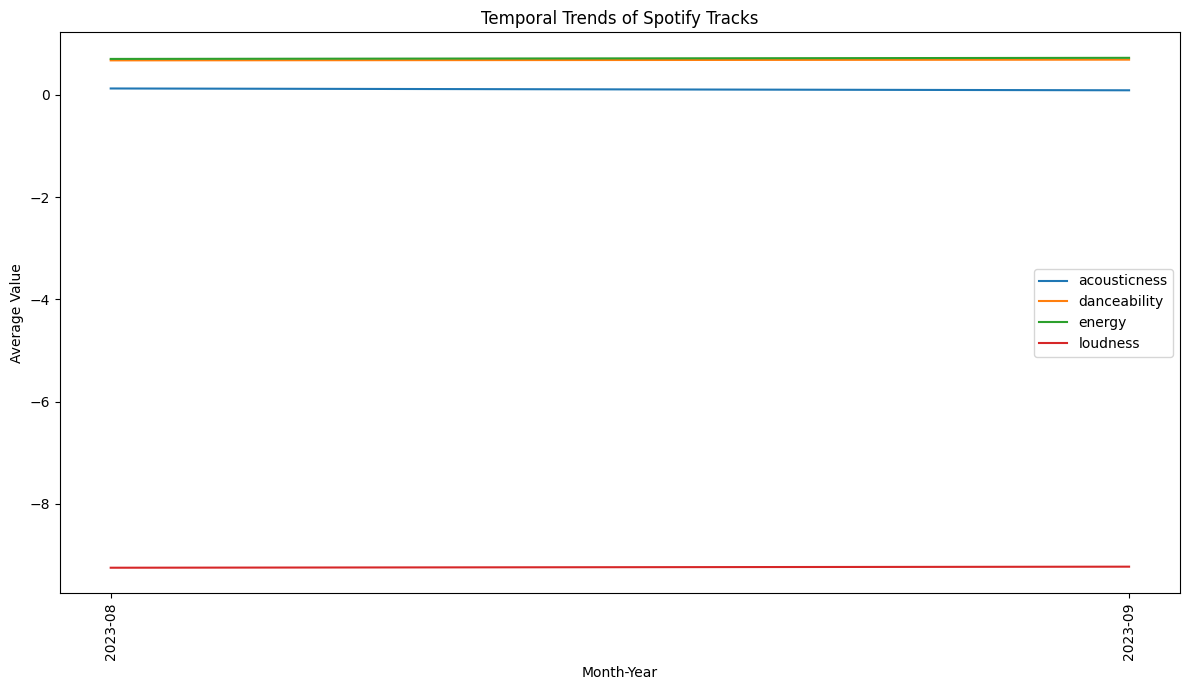

In [ ]:
# Temporal Trends: We'll group the data by month and calculate the mean for 'acousticness', 'danceability', 'energy', and 'loudness'.
# Release Patterns: We'll count the number of unique releases each month.
# Group by 'month_year' and calculate mean for the features.
temporal_trends = pd_df_sp_track_audio_features.groupby('month_year_af')['acousticness', 'danceability', 'energy', 'loudness'].mean().reset_index()
# temporal_trends
# Plot the temporal trends.
plt.figure(figsize=(12, 7))
for feature in ['acousticness', 'danceability', 'energy', 'loudness']:
    plt.plot(temporal_trends['month_year_af'].astype(str), temporal_trends[feature], label=feature)

plt.xticks(rotation=90)
plt.xlabel('Month-Year')
plt.ylabel('Average Value')
plt.title('Temporal Trends of Spotify Tracks')
plt.legend()
plt.tight_layout()
plt.show()


Some observations can be made:

**Acousticness** remains relatively low, which might suggest a preference for more produced, less organic sounds in the tracks.

**Danceability** appears to be relatively high, indicating a possible trend towards tracks with a beat or rhythm conducive to dancing.

**Energy levels** are high as well, which could correlate with the high danceability, supporting the idea that these tracks are upbeat and dynamic.

**Loudness** is consistent and on the lower side, which is common in digitally streamed music due to normalization processes platforms use to ensure a consistent listening experience.

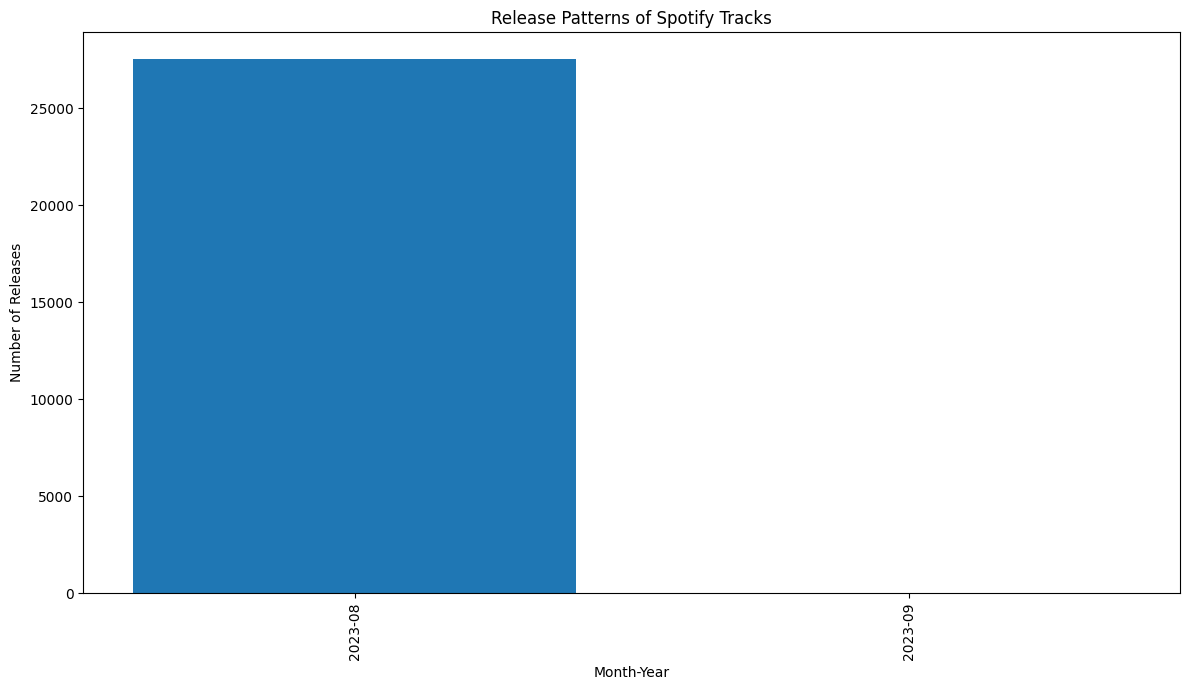

In [ ]:
# # Release Patterns: Count the number of unique releases each month.
release_patterns = pd_df_sp_track_audio_features.groupby('month_year_af')['release_id'].nunique().reset_index()
release_patterns
# Plot the release patterns.
plt.figure(figsize=(12, 7))
plt.bar(release_patterns['month_year_af'].astype(str), release_patterns['release_id'])
plt.xticks(rotation=90)
plt.xlabel('Month-Year')
plt.ylabel('Number of Releases')
plt.title('Release Patterns of Spotify Tracks')
plt.tight_layout()
plt.show()

**Release Patterns** <br/>
There's a noticeable drop in the number of releases from August to September. This could indicate a strategic release schedule that targets specific times of the year or month, or it may reflect industry-wide trends in music release cycles.

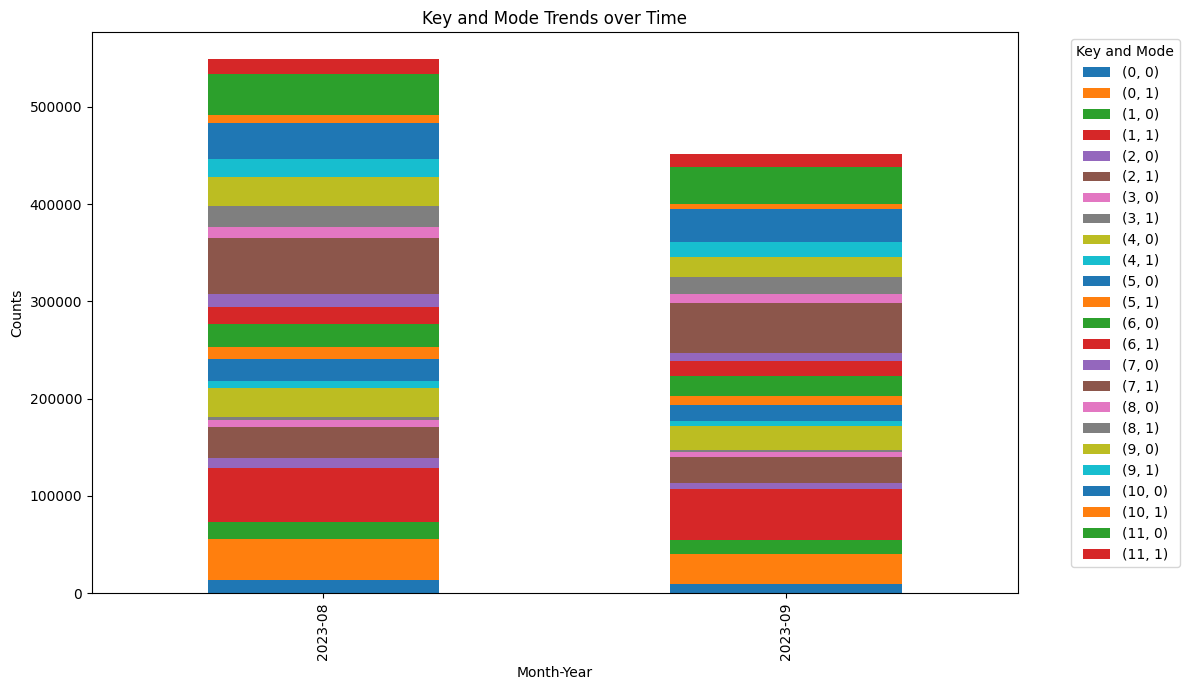

In [ ]:

# Key and Mode Trends over Time
key_mode_counts = pd_df_sp_track_audio_features.groupby(['key', 'mode', 'month_year_af']).size().reset_index(name='count')
key_mode_counts_pivot = key_mode_counts.pivot_table(index='month_year_af', columns=['key', 'mode'], values='count', fill_value=0)

# Plotting Key and Mode Trends over Time
key_mode_counts_pivot.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Key and Mode Trends over Time')
plt.xlabel('Month-Year')
plt.ylabel('Counts')
plt.legend(title='Key and Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




**Key and Mode Trends** <br/>
The bar chart demonstrates that the distribution of songs in different keys and modes appears consistent over the two months. This might suggest that there's no significant shift in the musical key preferences of releases during this period.

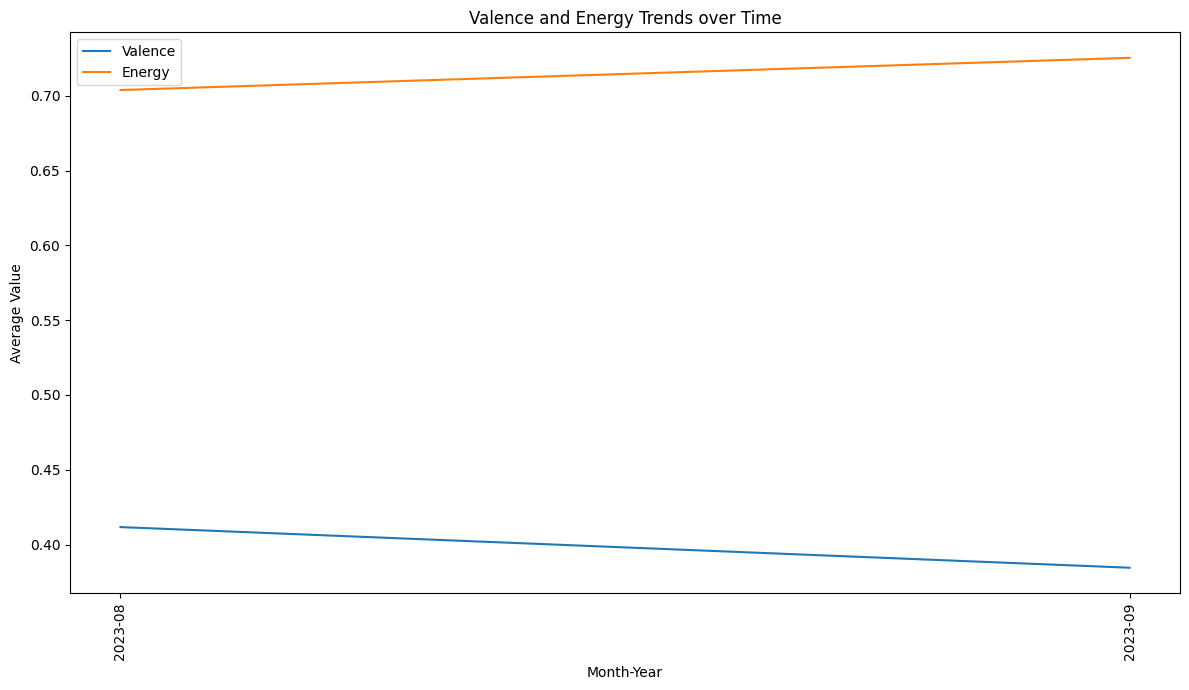

In [ ]:
# Valence and Energy Trends over Time
valence_energy_trends = pd_df_sp_track_audio_features.groupby('month_year_af').agg({'valence':'mean', 'energy':'mean'}).reset_index()

# Plotting Valence and Energy Trends over Time
plt.figure(figsize=(12, 7))
plt.plot(valence_energy_trends['month_year_af'].astype(str), valence_energy_trends['valence'], label='Valence')
plt.plot(valence_energy_trends['month_year_af'].astype(str), valence_energy_trends['energy'], label='Energy')
plt.xticks(rotation=90)
plt.xlabel('Month-Year')
plt.ylabel('Average Value')
plt.title('Valence and Energy Trends over Time')
plt.legend()
plt.tight_layout()
plt.show()


**Valence and Energy Trends**<br/>
The trends for valence and energy remain relatively stable over the months, with energy levels slightly higher than valence. This stability might suggest a consistent production preference or listener demand for tracks with these characteristics during these months.

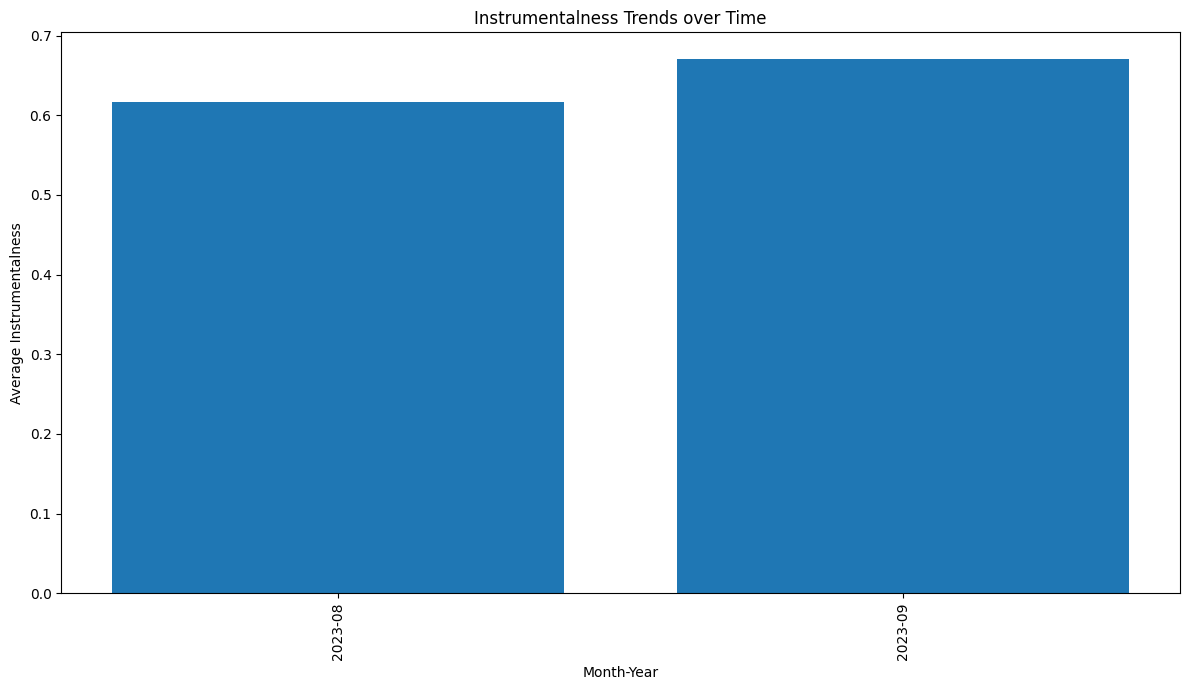

In [ ]:


# Instrumentalness Trends over Time
instrumentalness_trends = pd_df_sp_track_audio_features.groupby('month_year_af').agg({'instrumentalness':'mean'}).reset_index()

# Plotting Instrumentalness Trends over Time
plt.figure(figsize=(12, 7))
plt.bar(instrumentalness_trends['month_year_af'].astype(str), instrumentalness_trends['instrumentalness'])
plt.xticks(rotation=90)
plt.xlabel('Month-Year')
plt.ylabel('Average Instrumentalness')
plt.title('Instrumentalness Trends over Time')
plt.tight_layout()
plt.show()


**Instrumentalness Trends** <br/>
The average instrumentalness shows no substantial change from August to September. This could mean that the proportion of instrumental to vocal tracks remained the same, or that listener preference for instrumental tracks did not vary significantly during this time.

In [ ]:
# Count unique tracks and check for duplicates
unique_tracks = pd_df_sp_track_audio_features['track_id'].nunique()
duplicate_tracks = pd_df_sp_track_audio_features.duplicated(subset=['track_id', 'track_title']).sum()

print(f"Unique tracks: {unique_tracks}")
print(f"Duplicate tracks: {duplicate_tracks}")


Unique tracks: 175949
Duplicate tracks: 824050


### Feature Engineering

We combine 'acousticness', 'danceability', and 'energy' into a Composite Score. This score can be a simple average or a weighted average of these three features. It could represent the overall 'vibe' or 'feel' of a track.


In [ ]:
pd_df_sp_track_audio_features['vibe_score'] = pd_df_sp_track_audio_features[['acousticness', 'danceability', 'energy']].mean(axis=1)
pd_df_sp_track_audio_features['vibe_score']

0         0.336024
1         0.460000
2         0.402433
3         0.536860
4         0.341567
            ...   
999995    0.502133
999996    0.479270
999997    0.573333
999998    0.573333
999999    0.576468
Name: vibe_score, Length: 1000000, dtype: float64

Categorize 'loudness' into Bins. Loudness varies widely across tracks. We can categorize this feature into bins (e.g., low, medium, high) for easier analysis or modeling.

In [ ]:
pd_df_sp_track_audio_features['loudness_category'] = pd.cut(pd_df_sp_track_audio_features['loudness'], bins=[-np.inf, -20, -5, np.inf], labels=['Low', 'Medium', 'High'])
pd_df_sp_track_audio_features['loudness_category']

0         Medium
1            Low
2         Medium
3         Medium
4         Medium
           ...  
999995      High
999996    Medium
999997    Medium
999998    Medium
999999    Medium
Name: loudness_category, Length: 1000000, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

Duration into Minutes, converted 'duration_ms' from milliseconds to minutes as it might be more interpretable.

In [ ]:
pd_df_sp_track_audio_features['duration_min'] = pd_df_sp_track_audio_features['af_duration_ms'] / 60000
pd_df_sp_track_audio_features['duration_min']

0         5.020450
1         2.450000
2         3.538267
3         7.567383
4         2.614817
            ...   
999995    4.314283
999996    7.206667
999997    6.449633
999998    6.449633
999999    8.234167
Name: duration_min, Length: 1000000, dtype: float64

Day of Week from 'updated_on', extract the day of the week from the 'updated_on' column. It can be useful to analyze trends based on the day of the week.

In [ ]:
pd_df_sp_track_audio_features['day_of_week'] = pd.to_datetime(pd_df_sp_track_audio_features['af_updated_on']).dt.dayofweek
pd_df_sp_track_audio_features['day_of_week']

0         5
1         5
2         5
3         6
4         6
         ..
999995    0
999996    5
999997    3
999998    3
999999    5
Name: day_of_week, Length: 1000000, dtype: int64

Normalizing the 'tempo' feature to have values between 0 and 1. This can help in certain types of modeling

In [ ]:
min_tempo = pd_df_sp_track_audio_features['tempo'].min()
max_tempo = pd_df_sp_track_audio_features['tempo'].max()
pd_df_sp_track_audio_features['normalized_tempo'] = (pd_df_sp_track_audio_features['tempo'] - min_tempo) / (max_tempo - min_tempo)
pd_df_sp_track_audio_features['normalized_tempo']

0         0.416
1         0.272
2         0.508
3         0.508
4         0.540
          ...  
999995    0.528
999996    0.696
999997    0.536
999998    0.536
999999    0.584
Name: normalized_tempo, Length: 1000000, dtype: float64

Let's consider working with the 'vibe_score' feature, which is a composite score calculated from 'acousticness', 'danceability', and 'energy'. This score could provide a holistic view of the musical characteristics of each track.



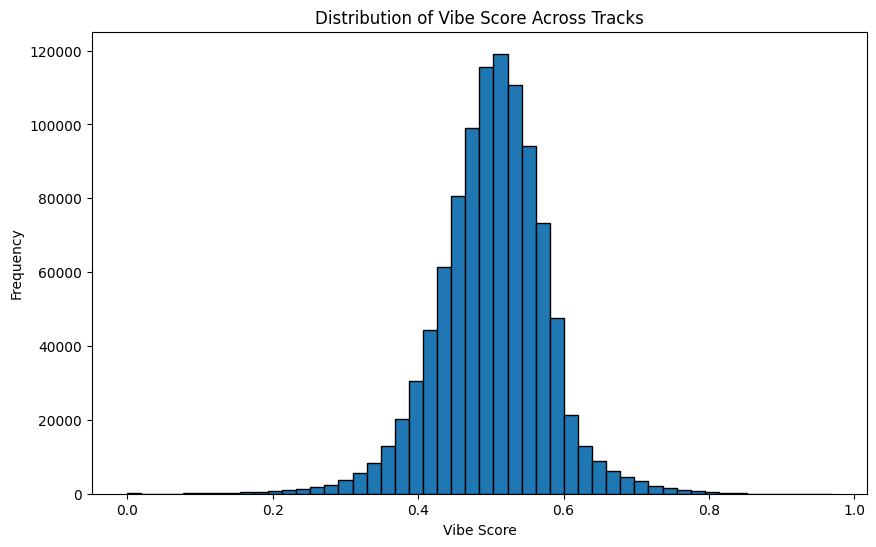

In [ ]:
# Plot the distribution of 'vibe_score'
plt.figure(figsize=(10, 6))
plt.hist(pd_df_sp_track_audio_features['vibe_score'], bins=50, edgecolor='black')
plt.xlabel('Vibe Score')
plt.ylabel('Frequency')
plt.title('Distribution of Vibe Score Across Tracks')
plt.show()


From the histogram, it appears that the distribution is centered around a mean value with a normal distribution shape. This indicates that most tracks have a moderate 'vibe_score', with fewer tracks having extremely low or high scores. This kind of distribution suggests that, on average, the tracks in  dataframe tend to have a balanced mix of acousticness, danceability, and energy, with no extreme deviations towards a particular vibe.

## Analysis Questions
During our exploratory data analysis of the Spotify dataset, we addressed the following five questions:


###1. **What are the release patterns for Spotify tracks?**

Release pattern analysis pointed to a higher number of releases in  the two months, which is indicative of strategic timing for music releases, possibly to coincide with specific seasons or events.

###2. **Does the spotify data indicate any particular trends in track valence and energy?**

The trends in valence and energy maintained a steady pattern, with no significant fluctuations, which imply a consistent mood in the music released during these two months.

###3.**Are certain keys or modes more prevalent in track releases?**

The key and mode analysis demonstrated that some combinations were more common than others, possibly reflecting popular choices in music production for the timeframe analyzed.


###4. **How do acousticness, danceability, energy, and loudness trends behave over time?**

The trend analysis revealed that these attributes remained relatively stable over the two months, suggesting consistent production characteristics or user preferences during the observed period.

###5. **What are the common attributes of tracks in terms of 'vibe score'?**

The 'vibe score' distribution was centered around a moderate range, indicating a general preference or trend towards tracks that balance acousticness, danceability, and energy.

## **Conclusion**
We used big data tools to study a large music dataset. We found patterns and insights by looking at basic stats and visualizing the data. We saw that people tend to like songs with a medium 'vibe score'.

We also looked at how music features changed over time and found that some features stayed the same. We noticed that songs are often released at specific times, maybe to get the most attention.

We made a new feature called 'vibe score' that combines other features to show the overall feel of a track. Most tracks had a balanced 'vibe score', which could be useful information for musicians and producers.

Our study helped us understand the dataset better and showed how it could be used in the music industry. The findings could help make decisions that align with what listeners like, improving their experience.

Relating it to real world ,this dataset suggests that Spotify's song recommendation system might focus on a balance in music features like acousticness, danceability, and energy. These features are important for the 'vibe score' of songs. The fact that these features don't change much over time suggests that the system might try to keep these features stable to appeal to a broad audience with different but specific tastes. The system might also take into account when songs are released to maximize user engagement. These findings can help us understand how Spotify chooses and recommends songs to its users, trying to consistently offer content that matches listener preferences and trends related to seasons or events.